# BigMart Sales Prediction Dataset - A Regression Problem
### The Data Scientists at BigMart have sales data in different cities. The aim is to build a predictive model and find out the sales of each product at a particular store.

After exploring the data using EDA, we fill out the missing values. Than we deal with the outliers and begin modeling using different Regression Algorithms. In the end we use deep learning to see if we can achieve better results.

## Import Libraries and Load Data

In [35]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) # file path

/kaggle/input/bigmart-sales-data/Train.csv
/kaggle/input/bigmart-sales-data/Test.csv


In [58]:
# Load Datas
df_test=pd.read_csv("/kaggle/input/bigmart-sales-data/Test.csv")
df_train=pd.read_csv("/kaggle/input/bigmart-sales-data/Train.csv")

In [59]:
df_train.shape, df_test.shape # shapes of train and test df

((8523, 12), (5681, 11))

## EDA - Exploratory Data Analysis

In [60]:
df=df_train # assign as df for easier usage
df.head() # first 5 entries

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info() # infos about the rows, columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.isnull().sum() # checking for missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We have a total amount of 8523 entries with 12 columns of information and some missing values.

In [7]:
df.describe() # statistical infos of the columns

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df.corr() # the correlation between the columns

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


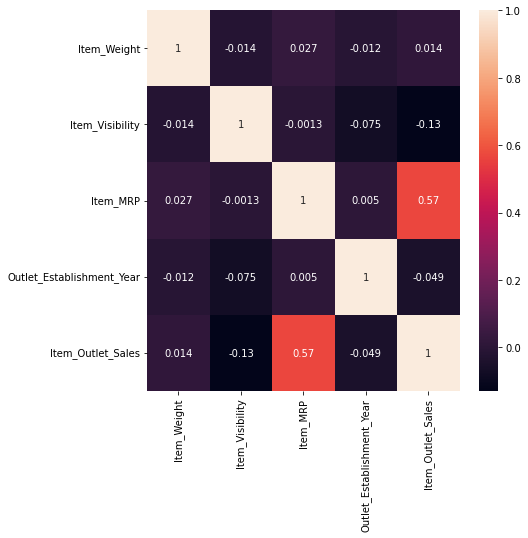

In [9]:
# Correlation of the columns shown in a heatmap
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True);

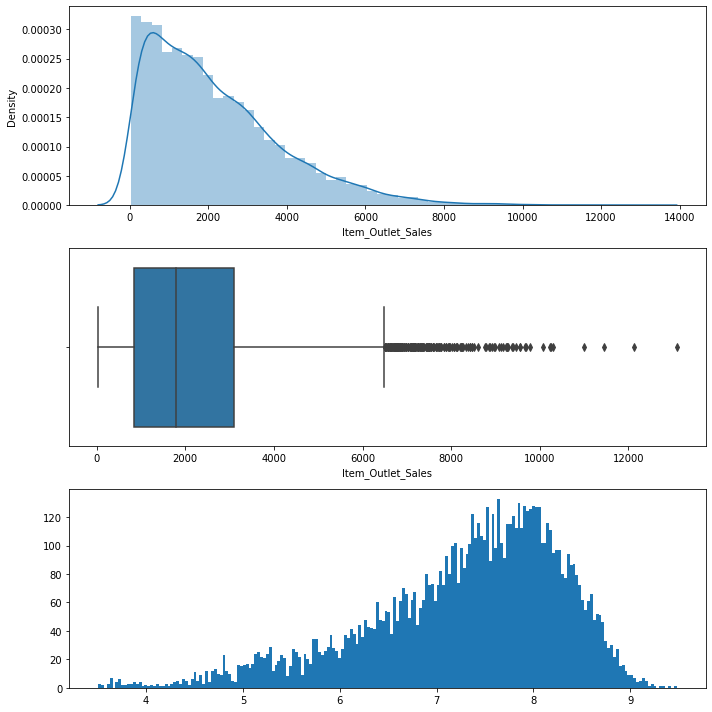

In [10]:
# plotting the Sales column in different forms
fig = plt.figure(figsize=(10,10)) 
fig.add_subplot(3,1,1)
sns.distplot(df['Item_Outlet_Sales'])
fig.add_subplot(3,1,2)
sns.boxplot(df['Item_Outlet_Sales'])
fig.add_subplot(3,1,3)
plt.hist((np.log(df.Item_Outlet_Sales)), bins=200);
plt.tight_layout();

## Missing Value Treatment

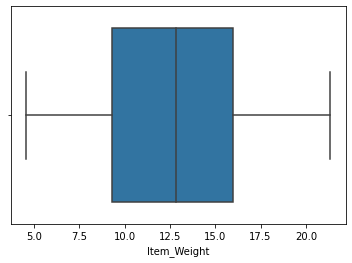

In [61]:
# fill Item_Weight with mean value
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True) 
sns.boxplot(x=df['Item_Weight']);

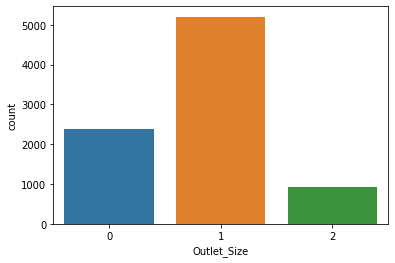

In [62]:
# turn Outlet_Size to digits and fill missing values with mode value
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)
df['Outlet_Size']=df['Outlet_Size'].map({"Small":0,"Medium":1,"High":2}).astype(int)
sns.countplot(x=df['Outlet_Size']);

## Data Vizualisation and Data Processing

In [63]:
# delete id columns, since they have no correlation with sales
df.drop(['Item_Identifier','Outlet_Identifier'],axis=1, inplace = True)
df.shape

(8523, 10)

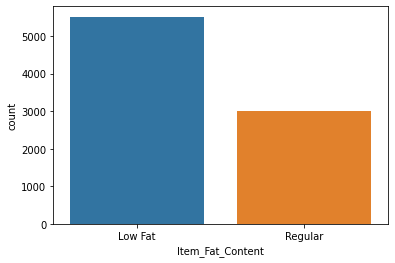

In [64]:
# feature engineering: mapping the fat content to their right entries using dictionaries
d={'Low Fat':'Low Fat','Regular':'Regular','LF':"Low Fat",'reg':"Regular",'low fat':"Low Fat"}
df['Item_Fat_Content']=df['Item_Fat_Content'].map(d)
sns.countplot(x=df['Item_Fat_Content']);

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

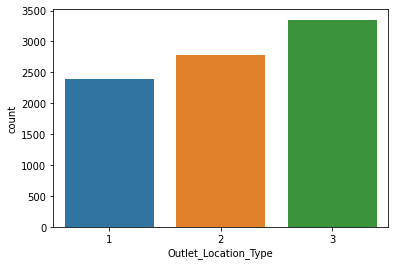

In [65]:
# get only last character so we only have digits
df['Outlet_Location_Type']=df['Outlet_Location_Type'].str[-1:].astype(int)
sns.countplot(x=df['Outlet_Location_Type'])

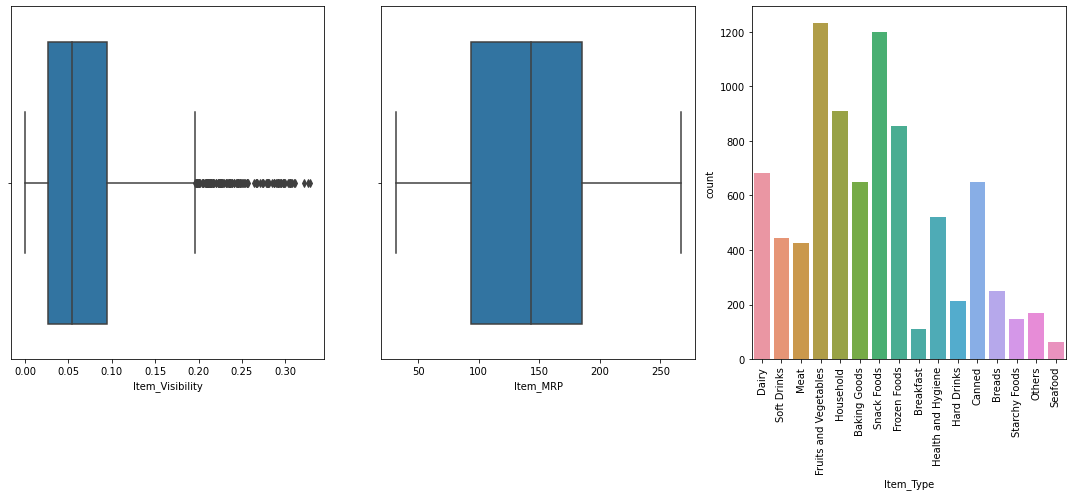

In [44]:
# Plot infos about the Items
fig = plt.figure(figsize=(15, 7))
fig.add_subplot(1, 3, 1)
sns.boxplot(x=df['Item_Visibility']);
fig.add_subplot(1, 3, 2)
sns.boxplot(x=df['Item_MRP'])
fig.add_subplot(1, 3, 3)
sns.countplot(x=df['Item_Type']);
plt.xticks(rotation=90);
plt.tight_layout()

### Outlier Treatment

In [17]:
# dealing with the outliers in item visibility
#df.quantile(.97).astype('int')
#outliers = df.quantile(.97) 
#df = df[(df['Item_Visibility']<outliers['Item_Visibility'])]
#sns.boxplot(x=df['Item_Visibility']);

This only reduced the accuracy score so I did run the code again without the outlier treatment.

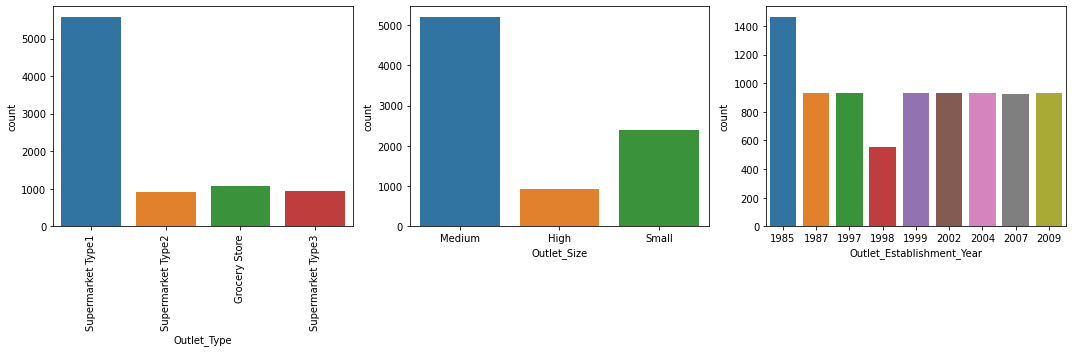

In [18]:
# Plot infos about the Outlets
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1, 3, 1)
sns.countplot(x=df['Outlet_Type']);
plt.xticks(rotation=90);
fig.add_subplot(1, 3, 2)
sns.countplot(x=df['Outlet_Size'])
fig.add_subplot(1, 3, 3)
sns.countplot(x=df['Outlet_Establishment_Year']);
plt.tight_layout()

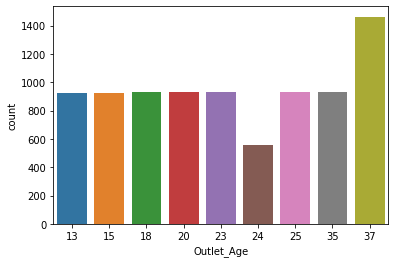

In [66]:
# Feature Engineering: getting the amount of established years in new column and delete old column
df['Outlet_Age']=2022-df['Outlet_Establishment_Year']
del df['Outlet_Establishment_Year']
sns.countplot(x=df['Outlet_Age']);

In [67]:
# see how the other columns are correlated with Item_Outlet_Sales
abs(df.corr()["Item_Outlet_Sales"].sort_values(ascending=False))

Item_Outlet_Sales       1.000000
Item_MRP                0.567574
Outlet_Location_Type    0.089367
Outlet_Size             0.086182
Outlet_Age              0.049135
Item_Weight             0.011550
Item_Visibility         0.128625
Name: Item_Outlet_Sales, dtype: float64

In [68]:
# Feature Engineering: trying to get a better score but doesn't affect the end results
df["Item_MRP"]=df["Item_MRP"]**2
df["Item_Visibility"]=df["Item_Visibility"]**2

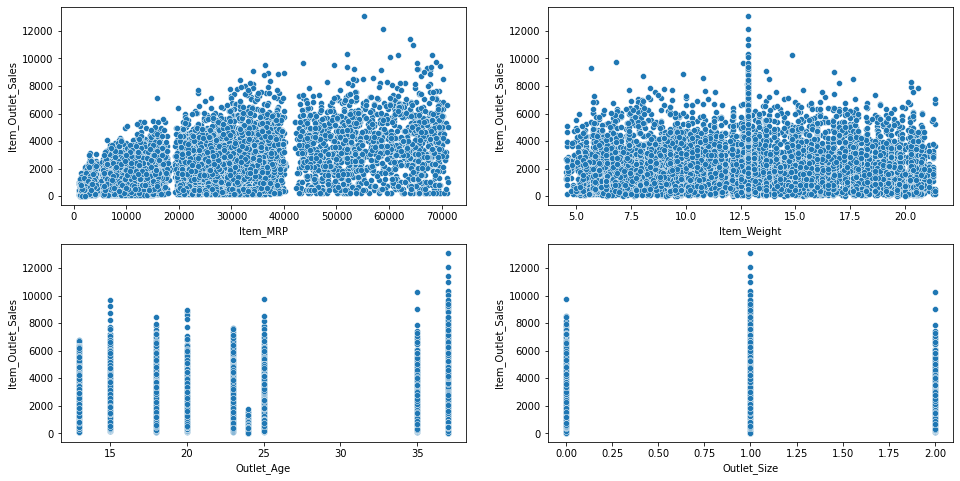

In [69]:
# seeing the corr of columns to the Item_Outlet_Sales
fig = plt.figure(figsize=(16,8))
fig.add_subplot(2,2,1)
sns.scatterplot(df['Item_MRP'], df['Item_Outlet_Sales'])
fig.add_subplot(2,2,2)
sns.scatterplot(df['Item_Weight'],df['Item_Outlet_Sales'])
fig.add_subplot(2,2,3)
sns.scatterplot(df['Outlet_Age'],df['Item_Outlet_Sales'])
fig.add_subplot(2,2,4)
sns.scatterplot(df['Outlet_Size'],df['Item_Outlet_Sales']);

## Modeling

In [49]:
# Function to call all Regression Algorithms
def regression_funct(x,y):
    #importing Regression libraries
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    from xgboost import XGBRegressor
    
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    # split the data in Train and Test 
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    XGBC= XGBRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN,XGBC]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor','XGBRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names) # create df with results
    
    for item in algos: # fit and predict model with all algos and append the results in their lists
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [70]:
# Assign x and y and get dummies because of object type entries
x,y=df.drop("Item_Outlet_Sales",axis=1),df[["Item_Outlet_Sales"]] 
x=pd.get_dummies(x,drop_first=True) # creates a sparse matrix - object to integer

In [71]:
regression_funct(x,y) # call regression function and see results in a Dataframe

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.603431,1038.201285,738.181566
Lasso,0.565276,1086.998946,816.552739
Ridge,0.564579,1087.869801,817.741622
LinearRegression,0.564479,1087.994363,818.185832
XGBRegressor,0.535349,1123.791448,779.182542
ElasticNet,0.360662,1318.219120,988.247781
KNeighborsRegressor,0.208630,1466.601659,1085.949244
ExtraTreeRegressor,0.165644,1505.906759,1043.625685


The best result shows the **GradientBoostingRegressor with only 60% accuracy** and **RMSE of 1038.2, MAE of 738.18** followd by LinearRegression and RidgeRegression with 56%.

## Using Deep Learning

In [26]:
# import Deep Learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
scaler=MinMaxScaler()

In [27]:
# Assign x and y and get dummies because of object type entries
x,y=df.drop("Item_Outlet_Sales",axis=1),df[["Item_Outlet_Sales"]] 
x=pd.get_dummies(x,drop_first=True) # creates a sparse matrix - object to integer
x=scaler.fit_transform(x) # scale x values

In [28]:
# split data in test and train
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [29]:
# Build the Model
model=Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')#mse regression

2022-12-15 22:49:01.670200: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [30]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=500, verbose=1)

2022-12-15 22:49:10.467429: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
54/54 [==============================] - 2s 17ms/step - loss: 4579253.0000 - val_loss: 2104790.2500
Epoch 2/500
54/54 [==============================] - 1s 13ms/step - loss: 1952312.0000 - val_loss: 1327347.5000
Epoch 3/500
54/54 [==============================] - 1s 11ms/step - loss: 1409729.8750 - val_loss: 1157399.7500
Epoch 4/500
54/54 [==============================] - 1s 12ms/step - loss: 1327478.6250 - val_loss: 1218923.2500
Epoch 5/500
54/54 [==============================] - 1s 25ms/step - loss: 1317467.5000 - val_loss: 1241280.8750
Epoch 6/500
54/54 [==============================] - 1s 12ms/step - loss: 1304655.7500 - val_loss: 1126168.0000
Epoch 7/500
54/54 [==============================] - 1s 12ms/step - loss: 1299154.1250 - val_loss: 1122924.2500
Epoch 8/500
54/54 [==============================] - 1s 13ms/step - loss: 1247582.0000 - val_loss: 1095765.0000
Epoch 9/500
54/54 [==============================] - 1s 14ms/step - loss: 1210366.6250 - val_loss: 10755

In [31]:
model.summary() # summary of our  model, with total of 324.601 trainable params

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               5400      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 200)               4

<AxesSubplot:>

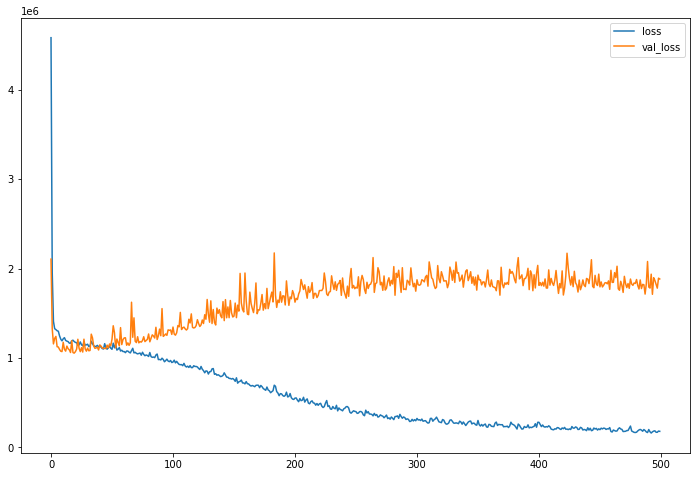

In [32]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8)) # Show results in a graph

In [33]:
pred=model.predict(x_test) # predict model

In [34]:
# show results
print("MSE:", (mean_squared_error(y_test,pred))**.5)
print("R2 Score:", r2_score(y_test,pred))

MSE: 1372.0938459200008
R2 Score: 0.307335446723659


We have a **R2 Score of only 31%** and a **MSE of 1372.1** using deep learning with 500 epochs.

All in all our model has not great results. I tried to get the R2 Score higher but this was the best I could do for now. Stay tuned for updates if we gain more knowledge.